Student: Tianhui Zhao

UID: 505 493 240

Lecture: ECON 441B

Instructor: Samuel Borghese

Due Date: Jan 19, 2024

# 1.) Pull in Data and Convert ot Monthly

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [15]:
# Calcualte the difference in stock price
df["Diff"] = df.diff().shift(-1)

In [17]:
# Target up or down
df["Target"] = np.sign(df["Diff"])

# Option Premium
df["Premium"] = .08 * df["Adj Close"]

In [18]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [20]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [25]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [22]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [26]:
df["Predictions"] = y_pred

In [33]:
df["Profits"] = 0.

# True Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df["Premium"]

# False Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = df["Diff"] * 100 + df["Premium"]



# 5.) Plot profits over time

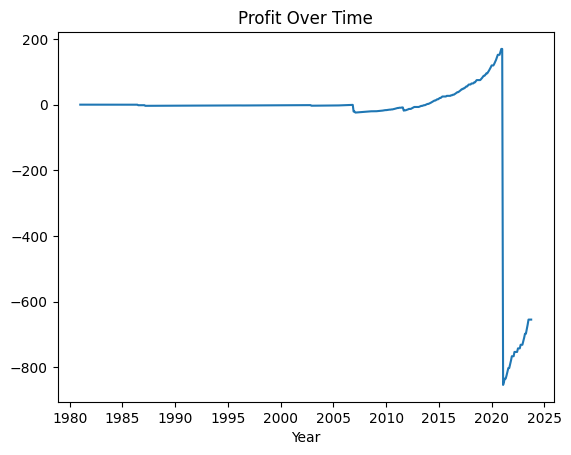

In [38]:
plt.plot(np.cumsum(df["Profits"]))
plt.title("Profit Over Time")
plt.xlabel("Year")
plt.show()

# Pandemic

# 5.5) Your skills from MQE to help Mr.Lius ventures


I learned how to collect and interpret data so I may help Mr. Lius's platform by tidying their data and present these data in more visual ways for interested clients. Also, since there are people coming to this platform to sell their personal brands, make features, develop strategies, I may assist in categorize clients' demands and match them with potential solutions or people those are able to help. For example, what we just learned above is useful in developing stock strategies and similarly classifying other decisions.

# 6.) Create a loop that stores total profits over time

In [ ]:
# NA

# 7.) What is the optimal threshold and plot the total profits for this model.

In [ ]:
# NA